<a href="https://colab.research.google.com/github/sonnylewis1/ML-Zoomcamp/blob/main/ML_Zoomcamp_Week_3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df = data[[
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]]

In [5]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df = df.fillna(0)

**QUESTION 1**

In [7]:
df['neighbourhood_group'].mode()

0    Manhattan
dtype: object

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [11]:
df_train.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
numerical = ['latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']

In [13]:
categorical = ['neighbourhood_group',
    'room_type']

In [14]:
df_train[numerical]

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.72760,-73.94495,3,29,0.70,13,50
1,40.70847,-74.00498,1,0,0.00,1,7
2,40.83149,-73.92766,40,0,0.00,1,0
3,40.66448,-73.99407,2,3,0.08,1,0
4,40.74118,-74.00012,1,48,1.80,2,67
...,...,...,...,...,...,...,...
29332,40.71748,-73.95685,6,5,0.13,1,0
29333,40.66397,-73.98538,1,7,0.17,2,0
29334,40.79994,-73.97001,1,1,0.64,1,88
29335,40.69585,-73.96344,60,0,0.00,1,0


In [15]:
correlation_matrix = df_train.corr()
correlation_matrix

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


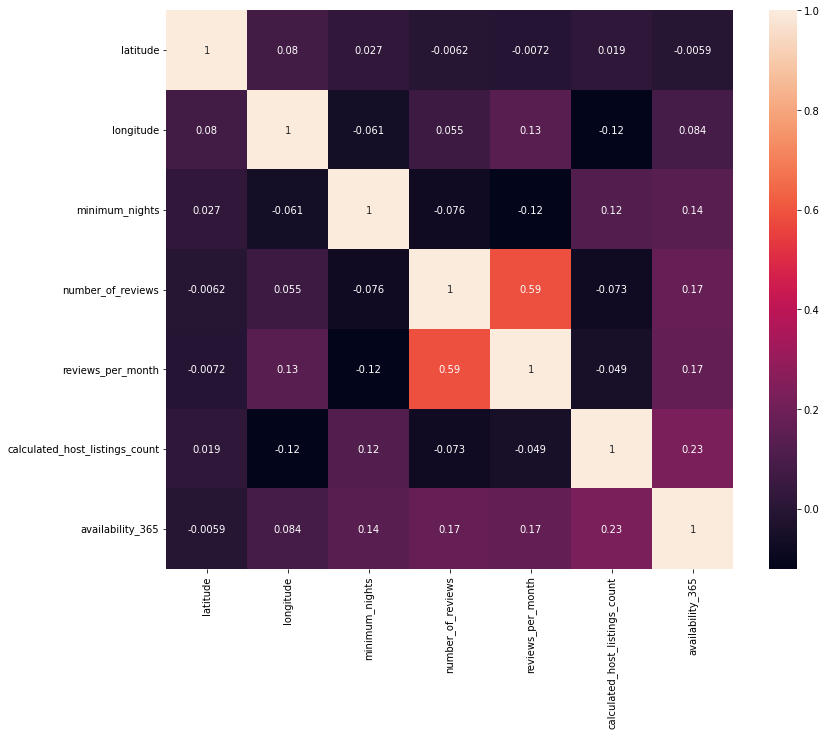

In [16]:
a4_dims = (12.7, 10.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.heatmap(correlation_matrix, annot=True, ax=ax)

In [17]:
y_train_bin = (y_train >= 152).astype(int)
y_test_bin = (y_test >= 152).astype(int)
y_val_bin = (y_val >= 152).astype(int)

**QUESTION 3**

In [18]:
score_ng = mutual_info_score(df_train.neighbourhood_group, y_train_bin)
round(score_ng, 2)

0.05

In [19]:
score_nt = mutual_info_score(df_train.room_type, y_train_bin)
round(score_nt, 2)

0.14

**QUESTION 4**

In [52]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [21]:
X_train

array([[ 50.     ,  13.     ,  40.7276 , ...,   1.     ,   0.     ,
          0.     ],
       [  7.     ,   1.     ,  40.70847, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.83149, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [ 88.     ,   1.     ,  40.79994, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.69585, ...,   0.     ,   1.     ,
          0.     ],
       [281.     ,   2.     ,  40.64438, ...,   1.     ,   0.     ,
          0.     ]])

In [22]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [23]:
model.fit(X_train, y_train_bin)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = model.predict_proba(X_val)[:, 1]

In [25]:
price_average = (y_pred >= 0.5)

In [36]:
original_acc = (y_val_bin == price_average).mean()

In [37]:
round(original_acc, 2)

0.79

**QUESTION 5**

In [38]:
columns = categorical + numerical
scores_dict = {}
diff = {}

for i in columns:
  rem_columns = columns.copy()
  rem_columns.remove(i)
  train_dict = df_train[rem_columns].to_dict(orient='records')
  X_train = dv.transform(train_dict)

  val_dict = df_val[rem_columns].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

  model.fit(X_train, y_train_bin)

  y_pred = model.predict_proba(X_val)[:, 1]
  price_average = (y_pred >= 0.5)

  scores = (y_val_bin == price_average).mean()

  scores_dict[i] = scores
  diff[i] = original_acc - scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [39]:
scores_dict

{'availability_365': 0.7815727579507107,
 'calculated_host_listings_count': 0.7866857551896922,
 'latitude': 0.7863789753553533,
 'longitude': 0.7867880151344718,
 'minimum_nights': 0.7855608957971163,
 'neighbourhood_group': 0.7509970344616014,
 'number_of_reviews': 0.7868902750792515,
 'reviews_per_month': 0.7852541159627774,
 'room_type': 0.7164331731260866}

In [40]:
diff

{'availability_365': 0.004908477349422236,
 'calculated_host_listings_count': -0.0002045198895592737,
 'latitude': 0.00010225994477963685,
 'longitude': -0.00030677983433891054,
 'minimum_nights': 0.0009203395030166206,
 'neighbourhood_group': 0.03548420083853154,
 'number_of_reviews': -0.0004090397791185474,
 'reviews_per_month': 0.0012271193373555311,
 'room_type': 0.07004806217404635}

**QUESTION 6**

In [48]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [50]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [55]:
alpha = [0, 0.01, 0.1, 1, 10]
a_dict = {}
for a in alpha:
  rdg = Ridge(alpha = a)
  rdg.fit(X_train, y_train)
  y_pred = rdg.predict(X_val)
  score = rmse(y_val, y_pred)
  a_dict[a] = round(score, 3)

In [56]:
a_dict

{0: 0.497, 0.01: 0.497, 0.1: 0.497, 1: 0.497, 10: 0.498}